In [131]:
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import warnings
warnings.simplefilter('ignore')

1. Ridge,Lasso, MLP 모델로 2015, '대형', 6.8, 159, 23, 'LPG', 0,  2359, 1935, '수동' 특성에 대한 가격을 예측하고 모형의 r2 점수(train, test )를 출력하시요.

In [132]:
train_df = pd.read_excel('data4/hyundaiCar.xlsx', sheet_name='train')
test_df  = pd.read_excel('data4/hyundaiCar.xlsx', sheet_name='test')
y_train = train_df['가격']
x_train = train_df.iloc[:, 1:]
y_test = test_df['가격']
x_test = test_df.iloc[:, 1:]

- replace를 이용한 직접 값 설정

In [133]:
x_train['종류']  = x_train['종류'].replace( ['대형', '중형', '준중형', '소형'] , [0, 1, 2, 3] )
x_train['연료']  = x_train['연료'].replace( ['가솔린', 'LPG', '디젤'] , [1, 2, 3] )
x_train['변속기']= x_train['변속기'].replace( ['자동', '수동'] , [1, 2] )

In [134]:
x_test['종류']  = x_test['종류'].replace( ['대형', '중형', '준중형', '소형'] , [0, 1, 2, 3] )
x_test['연료']  = x_test['연료'].replace( ['가솔린', 'LPG', '디젤'] , [1, 2, 3] )
x_test['변속기']= x_test['변속기'].replace( ['자동', '수동'] , [1, 2] )

- Ridge

In [135]:
model_ridge = make_pipeline( StandardScaler(),  Ridge() )
model_ridge.fit( x_train, y_train )
print(f' predict est : {model_ridge.predict( [[2015, 0, 6.8,159, 23, 2, 0, 2359, 1935, 2] ] )}' )
print(f'train data R2 : { model_ridge.score( x_train , y_train ) }' )
print(f'test data R2  : { model_ridge.score( x_test , y_test ) }' )

 predict est : [1570.06494025]
train data R2 : 0.8753060327795337
test data R2  : 0.7680043107708626


- Lasso

In [136]:
model_Lasso = make_pipeline( StandardScaler(),  Lasso(alpha=0.5) )
model_Lasso.fit( x_train, y_train )
print(f' predict est : {model_Lasso.predict( [[2015, 0, 6.8,159, 23, 2, 0, 2359, 1935, 2] ] )}' )
print(f'train data R2 : { model_Lasso.score( x_train , y_train ) }' )
print(f'test data R2  : { model_Lasso.score( x_test , y_test ) }' )

 predict est : [1533.98962085]
train data R2 : 0.8762172529363947
test data R2  : 0.7753328993067696


- MLP

In [137]:
modelMLP = make_pipeline( StandardScaler(), 
                         MLPRegressor( hidden_layer_sizes=[1000, 4], max_iter=10000, alpha=0.005, verbose=0, random_state=1) )
modelMLP.fit( x_train, y_train )
print(f' predict est : { modelMLP.predict( [[2015, 0, 6.8,159, 23, 2, 0, 2359, 1935, 2] ] )}' )
print(f'train data R2 : { modelMLP.score( x_train , y_train ) }' )
print(f'test data R2  : { modelMLP.score( x_test , y_test ) }' )

 predict est : [1926.10725742]
train data R2 : 0.9988569123145107
test data R2  : 0.9228586706469503


2. 프로야구.csv 로 
target: 2018년 연봉 
나머지:feature
모델의 r2 점수(train, test )를 출력하시오. heatmap을 그리고 다중공선성 컬럼을 확인하고, 다중공선성이 높은 컬럼을 제거후 모델의 r2 점수( train, test )를 출력하시오.

#### code 한눈에 보기.

In [46]:
# data
df = pd.read_csv('data4/프로야구.csv')
df = df[ df.columns.difference(['선수명']) ]

# Encoding
lbl = LabelEncoder()
df['팀명'] = lbl.fit_transform( df['팀명'] )

y_data = df['연봉(2018)']
x_data = df.drop(columns=['연봉(2018)'])
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2)

# Training 
model = make_pipeline( StandardScaler(), Ridge() )
model.fit( x_train, y_train )
print(f'train data R2 : { model.score( x_train , y_train ) }' )
print(f'test data R2 : { model.score( x_test , y_test ) }' )

# Hitmap
plt.figure( figsize=(14,10) )
sns.heatmap( df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='BuPu' ); plt.show()


# Multicollinearity
# 특성 데이터 간의 다중공선성 파악하기.
VIF             = pd.DataFrame()
VIF['VIF']      = [ variance_inflation_factor( x_data.values, i ) for i in range( x_data.shape[1] ) ]
VIF['features'] = x_data.columns
VIF

# 위험하다고 판단되는 특성데이터 컬럼 제거후 VIF 지수 파악.
df2              = x_data[ x_data.columns.difference(['FIP','홈런/9','이닝','LOB%','BABIP']) ]
VIF2             = pd.DataFrame()
VIF2['VIF']      = [ variance_inflation_factor( df2.values, i ) for i in range( df2.shape[1] ) ]
VIF2['features'] = df2.columns
VIF2

# Retraining 
x_data2 = df2
x_train2, x_test2, y_train2, y_test2 = train_test_split( x_data2, y_data, test_size=0.2)
model2 = make_pipeline( StandardScaler(), Ridge() )
model2.fit( x_train2, y_train2 )
print(f'train data R2 : { model2.score( x_train2 , y_train2 ) }' )
print(f'test data R2 : { model2.score( x_test2 , y_test2 ) }' )

In [53]:
df = pd.read_csv('data4/프로야구.csv')
df = df[ df.columns.difference(['선수명']) ]
lbl = LabelEncoder()
df['팀명'] = lbl.fit_transform( df['팀명'] )

In [54]:
y_data = df['연봉(2018)']
x_data = df.drop(columns=['연봉(2018)'])
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2)

In [80]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2)
model = make_pipeline( StandardScaler(), Ridge() )
model.fit( x_train, y_train )
print(f'train data R2 : { model.score( x_train , y_train ) }' )
print(f'test data R2 : { model.score( x_test , y_test ) }' )

train data R2 : 0.9292442460736654
test data R2 : 0.7355598792114666


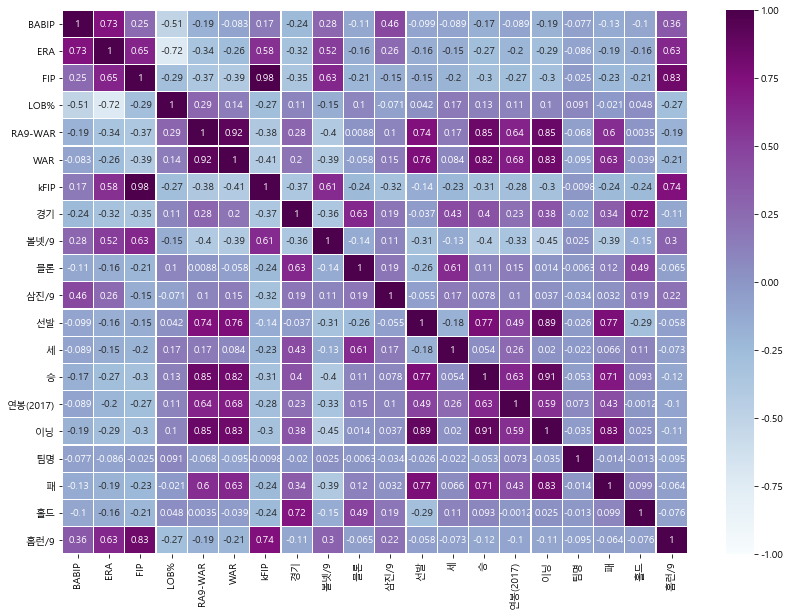

In [66]:
plt.figure( figsize=(14,10) )
sns.heatmap( x_data.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='BuPu' ); plt.show()

In [69]:
VIF             = pd.DataFrame()
VIF['VIF']      = [ variance_inflation_factor( x_data.values, i ) for i in range( x_data.shape[1] ) ]
VIF['features'] = x_data.columns
VIF

,VIF,features
0,47.540298,BABIP
1,29.558282,ERA
2,101632.023208,FIP
3,99.670512,LOB%
4,17.435159,RA9-WAR
5,12.686688,WAR
6,69877.012701,kFIP
7,44.054165,경기
8,122.773415,볼넷/9
9,3.582084,블론


In [74]:
df2              = x_data[ x_data.columns.difference(['FIP','홈런/9','이닝','LOB%','BABIP']) ]
VIF2             = pd.DataFrame()
VIF2['VIF']      = [ variance_inflation_factor( df2.values, i ) for i in range( df2.shape[1] ) ]
VIF2['features'] = df2.columns
VIF2

,VIF,features
0,7.218885,ERA
1,13.900094,RA9-WAR
2,11.552621,WAR
3,15.653219,kFIP
4,14.518021,경기
5,9.317763,볼넷/9
6,3.558291,블론
7,9.153841,삼진/9
8,15.910647,선발
9,3.009633,세


In [81]:
x_data2 = df2
x_train2, x_test2, y_train2, y_test2 = train_test_split( x_data2, y_data, test_size=0.2)
model2 = make_pipeline( StandardScaler(), Ridge() )
model2.fit( x_train2, y_train2 )
print(f'train data R2 : { model2.score( x_train2 , y_train2 ) }' )
print(f'test data R2 : { model2.score( x_test2 , y_test2 ) }' )

train data R2 : 0.9327801029473862
test data R2 : 0.8262343662663729


일부 다중공선성 문제 해결을 통해 Train data와 Test data 간의 과대 적합 문제가 완화된 것을 알 수 있다.